  Using cached numpy-2.2.6-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.6-cp312-cp312-win_amd64.whl (12.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.2.6 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.6 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.


  Using cached numpy-2.1.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.1.3-cp312-cp312-win_amd64.whl (12.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.1.3 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.1.3 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.1.3 which is incompatible.


  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
C:\Users\saiprasad\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 196ms/step - accuracy: 0.0529 - loss: 3.6863 - val_accuracy: 0.1063 - val_loss: 3.2475
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 233ms/step - accuracy: 0.1001 - loss: 3.2656 - val_accuracy: 0.1781 - val_loss: 2.9965
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 241ms/step - accuracy: 0.1811 - loss: 2.9886 - val_accuracy: 0.2719 - val_loss: 2.7648
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 199ms/step - accuracy: 0.2582 - loss: 2.6562 - val_accuracy: 0.2594 - val_loss: 2.6686
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 243ms/step - accuracy: 0.3863 - loss: 2.2370 - val_accuracy: 0.3594 - val_loss: 2.4494
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 224ms/step - accuracy: 0.5323 - loss: 1.6739 - val_accuracy: 0.3875 - val_loss: 2.2957
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 227ms/step - accuracy: 0.6723 - loss: 1.1397 - val_accuracy: 0.3562 - val_loss: 2.2871
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 223ms/step - accuracy: 0.7492 - loss: 0.8971 - val_accuracy:

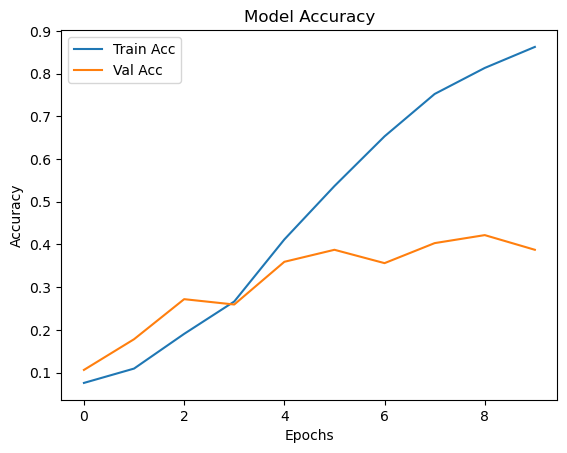

In [8]:
# Step 1: Import necessary libraries
# First, install the required packages
!pip install opencv-python
!pip install tensorflow
!pip install scikit-learn
!pip install matplotlib

# Import necessary libraries
import os
import numpy as np
import cv2  # OpenCV for image processing
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Now the rest of your code will work
def load_dataset(dataset_path, img_size=(128, 128)):
    images = []
    labels = []
    class_names = os.listdir(dataset_path)
    for class_label, class_name in enumerate(class_names):
        class_folder_path = os.path.join(dataset_path, class_name)
        if not os.path.isdir(class_folder_path): continue
        for img_file in os.listdir(class_folder_path):
            img_path = os.path.join(class_folder_path, img_file)
            img = cv2.imread(img_path)
            if img is None: continue
            img = cv2.resize(img, img_size)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            images.append(img)
            labels.append(class_label)
    return np.array(images), np.array(labels)

# Step 3: Set dataset path and load it
dataset_path = r'C:\Users\saiprasad\Downloads\tree\Tree_Species_Dataset'  # Change this to your dataset folder
X, y = load_dataset(dataset_path)

# Rest of your code remains the same

# Step 4: Preprocess labels and images
X = X.astype('float32') / 255.0
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_onehot = to_categorical(y_encoded)

# Step 5: Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Step 6: Define CNN model
def build_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2,2)),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = build_model(X_train.shape[1:], y_onehot.shape[1])

# Step 7: Train model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

# Step 8: Evaluate model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Step 9: Plot training history
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()